In [13]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_gaussian_quantiles
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_swiss_roll
from sklearn.datasets import make_s_curve
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [14]:
df = pd.read_csv('C:/Users/Lenovo/Downloads/auto_data_full.csv')
df

,ads_id,manufacturer,model,title_big,year,odometer,body_type,color,engine,transmission,drivetrain,state,customs_clearance,rating,reviews,description,price
0,№ 4945090,Volkswagen,Polo,Volkswagen Polo (V) Рестайлинг,2015.0,77 500 км,Седан,Бордовый,1.6 л / Бензин,Автоматическая,Передний,С пробегом,Да,"4,6",по 25 отзывам,"1 владелец, заказ-наряды в наличии, 2 комплект...",10 350 $ / 9566 €
1,№ 4945937,Land Rover,Discovery Sport,Land Rover Discovery Sport I Рестайлинг R-Dinamic,2020.0,82 000 км,Внедорожник,Черный,2 л / Бензин,Автоматическая,Полный,С пробегом,Да,NaN,NaN,"Автомобиль в идеальном состоянии, один владеле...",43 000 $ / 39 745 €
2,№ 4947422,Mercedes-Benz,B-Класс,Mercedes-Benz B-Класс (W245) Рестайлинг,2008.0,310 000 км,Хетчбэк,Белый,1.5 л / Бензин,Механическая,Передний,С пробегом,Да,"4,2",по 1 отзыву,Хороший автомобильчик ищет себе нового заботли...,7800 $ / 7209 €
3,№ 4865598,Tesla,Model S,Tesla Model S (I) Рестайлинг 75,2016.0,117 800 км,Лифтбэк,Серебристый,Электро,Автоматическая,Задний,С пробегом,Да,NaN,NaN,Специальная цена актуальная в ближайшее время ...,26 900 $ / 24 863 €
4,№ 4947391,Volkswagen,Tiguan,Volkswagen Tiguan (II),2020.0,57 132 км,Внедорожник,Черный,2 л / Бензин,Автоматическая,Передний,С пробегом,Да,"4,7",по 10 отзывам,"Отличное состояние. Новое масло , фильтра, мас...",18 700 $ / 17 284 €
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7915,№ 4937060,BMW,X1,BMW X1 (E84),2011.0,170 000 км,Внедорожник,Синий,2 л / Бензин,Автоматическая,Задний,С пробегом,Да,"4,4",по 1 отзыву,Ищу нового хозяина для своего авто!!!\n-Внешне...,12 900 $ / 11 902 €
7916,№ 4937056,BMW,5 серия,BMW 5 серия (G30/G31),2018.0,212 000 км,Седан,Черный,2 л / Дизель,Автоматическая,Задний,С пробегом,Да,"4,9",по 3 отзывам,Авто пригнан из Германии в сентябре 2022года.\...,33 300 $ / 30 722 €
7917,№ 4932296,Renault,Duster,Renault Duster I Рестайлинг,2017.0,153 200 км,Внедорожник,Коричневый,1.5 л / Дизель,Механическая,Полный,С пробегом,Да,"4,5",по 7 отзывам,Автомобиль покупался новым у официального диле...,13 499 $ / 12 454 €
7918,№ 4903334,Mercedes-Benz,Sprinter,Mercedes-Benz Sprinter (II) 316 CDI,2011.0,350 000 км,Фургон,Желтый,2.2 л / Дизель,Механическая,Передний,С пробегом,Да,NaN,NaN,"до 3,5 тонн, тентованный, 2.2 л, дизель, механ...",25 000 $ / 23 065 €



# Удаляем суффикс "км" из колонки "odometer" и убираем пробелы



In [15]:
df["odometer"] = df["odometer"].str.removesuffix("км").str.replace(' ', '')

# Создаем новую колонку "modification"

In [16]:
df['modification'] = df.apply(lambda x: x['title_big'].replace(x['manufacturer'], '').replace(x['model'], '').strip(), axis=1)

# Разбиваем столбец "engine" на два столбца "engine_volume" и "engine_type"

In [18]:
split_engine = df["engine"].str.split('л / ')
df["engine_volume"] = split_engine.str[0].str.strip()
df["engine_type"] = split_engine.str[1].str.strip()
df.drop(columns="engine", inplace=True)


# Создаем новые столбцы "is_hybrid" и "gas_equipment" на основе содержимого "engine_type"

In [17]:
df['engine']: ['Бензин', 'Электро', 'Дизель', None, '/ Газобалонное оборудование']

def parse_engine_specs(spec):
    volume = None
    engine_type = None
    is_hybrid = False
    add_equipment = False
    
    if spec is not None:
        if "Электро" in spec:
            engine_type = "Электро"
        elif "Гибрид" in spec:
            is_hybrid = True
        
        if "/ Газобалонное оборудование" in spec:
            add_equipment = True
            
        parts = spec.split(" / ")
        if len(parts) > 0 and parts[0] != "":
            try:
                volume = float(parts[0].split(" ")[0])
            except ValueError:
                volume = None
        if len(parts) > 1:
            engine_type = parts[1]
    
    return volume, engine_type, is_hybrid, add_equipment

# Создание новых столбцов
df[['volume', 'engine_type', 'is_hybrid', 'gas_equipment']] = df['engine'].apply(parse_engine_specs).apply(pd.Series)

print(df)


         ads_id   manufacturer            model  \
0     № 4945090     Volkswagen             Polo   
1     № 4945937     Land Rover  Discovery Sport   
2     № 4947422  Mercedes-Benz          B-Класс   
3     № 4865598          Tesla          Model S   
4     № 4947391     Volkswagen           Tiguan   
...         ...            ...              ...   
7915  № 4937060            BMW               X1   
7916  № 4937056            BMW          5 серия   
7917  № 4932296        Renault           Duster   
7918  № 4903334  Mercedes-Benz         Sprinter   
7919  № 4935433     Volkswagen            Jetta   

                                              title_big    year odometer  \
0                        Volkswagen Polo (V) Рестайлинг  2015.0    77500   
1     Land Rover Discovery Sport I Рестайлинг R-Dinamic  2020.0    82000   
2               Mercedes-Benz B-Класс (W245) Рестайлинг  2008.0   310000   
3                       Tesla Model S (I) Рестайлинг 75  2016.0   117800   
4      

# Удаляем столбец "price" и преобразуем столбец "reviews" оставив только цифры

In [19]:
df['price_in_dollars'] = df['price'].replace('\$.*', '', regex=True)
df.drop(columns='price', inplace=True)
df['reviews'] = df['reviews'].replace('[^\d]+', '', regex=True)

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15776\889786958.py:1: SyntaxWarning: invalid escape sequence '\$'
  df['price_in_dollars'] = df['price'].replace('\$.*', '', regex=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15776\889786958.py:3: SyntaxWarning: invalid escape sequence '\d'
  df['reviews'] = df['reviews'].replace('[^\d]+', '', regex=True)


# Cоздаем новый столбец 'owners_count'

In [20]:
# Словарь для преобразования числительных в числа
num_dict = {'первый': '1', 'второй': '2', 'третий': '3', 'четвертый': '4', 'пятый': '5',
            'шестой': '6', 'седьмой': '7', 'восьмой': '8', 'девятый': '9', 'десятый': '10',
            'один': '1', 'единственный': '1', '2-ой': '2', 'торой': '2', '(один': '1',
            'бриф.один': '1', ',один': '1', '3-й': '3', '(1ый': '1', '1-й': '1', '2-й': '2', 'одиен': '1'}  # Добавлены новые значения  # Добавлены 'один' и 'единственный'

df['owner_info'] = ''

for index, row in df.iterrows():
    description = row['description'].lower()

    if 'владелец' in description:
        words = description.split()
        for i, word in enumerate(words):
            if word == 'владелец':
                # Получение первого слова после 'владелец'
                next_word = words[i-1] if i-1 < len(words) else None
                # Если следующее слово присутствует в num_dict, преобразовать его в число и добавить в 'owner_info'
                if next_word in num_dict:
                    next_word = num_dict[next_word]
                    df.at[index, 'owner_info'] = next_word
                break

print(df[['description', 'owner_info']].head(10))



                                         description owner_info
0  1 владелец, заказ-наряды в наличии, 2 комплект...           
1  Автомобиль в идеальном состоянии, один владеле...           
2  Хороший автомобильчик ищет себе нового заботли...          1
3  Специальная цена актуальная в ближайшее время ...           
4  Отличное состояние. Новое масло , фильтра, мас...           
5  Помощь в продаже не нужна.\nОригинальный пробе...           
6  12 месяц 2018 год!!! Есть новая зимняя резина ...           
7  Тех. осмотр до 10.2014\nТолько что были замене...          2
8  Мощный, надежный и безопасный авто для любой п...           
9  Владею около 4 лет, проехал 100тысч. История в...           


In [21]:
# Просмотр каждой строки в столбце 'owner_info'
for index, row in df['owner_info'].items():
    print(f"Index: {index}, Value: {row}")


Index: 0, Value: 
Index: 1, Value: 
Index: 2, Value: 1
Index: 3, Value: 
Index: 4, Value: 
Index: 5, Value: 
Index: 6, Value: 
Index: 7, Value: 2
Index: 8, Value: 
Index: 9, Value: 
Index: 10, Value: 
Index: 11, Value: 
Index: 12, Value: 2
Index: 13, Value: 
Index: 14, Value: 2
Index: 15, Value: 
Index: 16, Value: 
Index: 17, Value: 
Index: 18, Value: 
Index: 19, Value: 
Index: 20, Value: 
Index: 21, Value: 
Index: 22, Value: 
Index: 23, Value: 
Index: 24, Value: 2
Index: 25, Value: 
Index: 26, Value: 
Index: 27, Value: 
Index: 28, Value: 
Index: 29, Value: 
Index: 30, Value: 1
Index: 31, Value: 
Index: 32, Value: 
Index: 33, Value: 
Index: 34, Value: 
Index: 35, Value: 1
Index: 36, Value: 1
Index: 37, Value: 
Index: 38, Value: 1
Index: 39, Value: 
Index: 40, Value: 
Index: 41, Value: 
Index: 42, Value: 
Index: 43, Value: 
Index: 44, Value: 
Index: 45, Value: 
Index: 46, Value: 
Index: 47, Value: 
Index: 48, Value: 
Index: 49, Value: 1
Index: 50, Value: 
Index: 51, Value: 
Index: 52, V

In [22]:
df["подогрев"] = (df['description'].str.lower().str.contains("подогрев")).astype(int)
df["менял"] = (df['description'].str.lower().str.contains("менял")).astype(int)
df["through_phone"] = (df['description'].str.lower().str.contains("по телефон|звонит", regex=True)).astype(int)
df["аварии"] = (df['description'].str.lower().str.contains("авари")).astype(int)
df["лизинг"] = (df['description'].str.lower().str.contains("лизинг")).astype(int)
df["новое"] = (df['description'].str.lower().str.contains("новы|ново", regex=True)).astype(int)
df["повреждения"] = (df['description'].str.lower().str.contains("поврежд")).astype(int)
df["ндс"] = (df['description'].str.lower().str.contains("ндс")).astype(int)
df["комплектация_в_описании"] = (df['description'].str.lower().str.contains("комплектац")).astype(int)
df["отличное_упоминание"] = (df['description'].str.lower().str.contains("отличн")).astype(int)
df["торг"] = (df['description'].str.lower().str.contains("торг")).astype(int)
df["автосалон"] = (df['description'].str.lower().str.contains("автосалон")).astype(int)

In [23]:
num_dict = {'один': '1', 'два': '2', 'три': '3', 'четыре': '4', 'пять': '5',
            'шесть': '6', 'семь': '7', 'восемь': '8', 'девять': '9', 'десять': '10',
            '1': '1', '2': '2', '3': '3', '4': '4', '5': '5',
            '6': '6', '7': '7', '8': '8', '9': '9', '10': '10'}  

df['num_keys'] = ''

for index, row in df.iterrows():
    description = row['description'].lower()

    if 'ключ' in description:
        words = description.split()
        for i, word in enumerate(words):
            if word == 'ключ':
                # Получение первого слова после 'ключ'
                next_word = words[i-1] if i-1 < len(words) else None
                # Если следующее слово присутствует в num_dict, преобразовать его в число и добавить в 'num_keys'
                if next_word in num_dict:
                    next_word = num_dict[next_word]
                    df.at[index, 'num_keys'] = next_word
                break

print(df[['description', 'num_keys']].head(10))

                                         description num_keys
0  1 владелец, заказ-наряды в наличии, 2 комплект...         
1  Автомобиль в идеальном состоянии, один владеле...         
2  Хороший автомобильчик ищет себе нового заботли...         
3  Специальная цена актуальная в ближайшее время ...         
4  Отличное состояние. Новое масло , фильтра, мас...         
5  Помощь в продаже не нужна.\nОригинальный пробе...         
6  12 месяц 2018 год!!! Есть новая зимняя резина ...         
7  Тех. осмотр до 10.2014\nТолько что были замене...         
8  Мощный, надежный и безопасный авто для любой п...         
9  Владею около 4 лет, проехал 100тысч. История в...         


In [86]:
df

,manufacturer,model,year,odometer,rating,reviews,modification,volume,is_hybrid,gas_equipment,...,state_nan,customs_clearance_Да,customs_clearance_Нет,engine_type_/ Газобалонное оборудование,engine_type_Бензин,engine_type_Бензин / Газобалонное оборудование,engine_type_Бензин / Гибрид,engine_type_Дизель,engine_type_Дизель / Гибрид,engine_type_nan
0,85,574,2015.0,77500.0,4.6,25.0,984,1.6,False,False,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,48,278,2020.0,82000.0,NaN,NaN,1427,2.0,False,False,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,58,148,2008.0,310000.0,4.2,1.0,1110,1.5,False,False,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,83,518,2016.0,117800.0,NaN,NaN,719,NaN,False,False,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,85,735,2020.0,57132.0,4.7,10.0,755,2.0,False,False,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7915,4,808,2011.0,170000.0,4.4,1.0,263,2.0,False,False,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7916,4,72,2018.0,212000.0,4.9,3.0,522,2.0,False,False,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7917,71,285,2017.0,153200.0,4.5,7.0,1382,1.5,False,False,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7918,58,694,2011.0,350000.0,NaN,NaN,769,2.2,False,False,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [24]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Вывод количества категориальных колонок и их названий
print("Количество категориальных колонок:", len(categorical_columns))
print("Названия категориальных колонок:", categorical_columns)

Количество категориальных колонок: 20
Названия категориальных колонок: ['ads_id', 'manufacturer', 'model', 'title_big', 'odometer', 'body_type', 'color', 'transmission', 'drivetrain', 'state', 'customs_clearance', 'rating', 'reviews', 'description', 'modification', 'engine_type', 'engine_volume', 'price_in_dollars', 'owner_info', 'num_keys']


In [25]:
df['reviews'].dropna()
df['rating'].dropna()



0       4,6
2       4,2
4       4,7
5       4,8
7       4,6
       ... 
7911    3,8
7913    4,3
7915    4,4
7916    4,9
7917    4,5
Name: rating, Length: 4794, dtype: object

In [28]:
df['engine_volume'] = df['engine_volume'].replace('Электро', '0')

df['engine_volume'] = df['engine_volume'].str.replace('л/', '')

df['owner_info'] = df['owner_info'].fillna(0)
df['num_keys'] = df['num_keys'].fillna(0)


# Кодировка данных 

In [26]:
columns = df.columns.tolist()

print(len(columns))
print(columns)

36
['ads_id', 'manufacturer', 'model', 'title_big', 'year', 'odometer', 'body_type', 'color', 'transmission', 'drivetrain', 'state', 'customs_clearance', 'rating', 'reviews', 'description', 'modification', 'volume', 'engine_type', 'is_hybrid', 'gas_equipment', 'engine_volume', 'price_in_dollars', 'owner_info', 'подогрев', 'менял', 'through_phone', 'аварии', 'лизинг', 'новое', 'повреждения', 'ндс', 'комплектация_в_описании', 'отличное_упоминание', 'торг', 'автосалон', 'num_keys']


In [29]:
# Список колонок, которые нужно преобразовать
columns_to_convert = ['odometer', 'rating', 'reviews', 'price_in_dollars','engine_volume','owner_info','num_keys']

# Замена запятых на точки и преобразование в числовой формат
for col in columns_to_convert:
    # Удаление всех пробелов
    df[col] = df[col].astype(str).str.replace(' ', '')
    # Замена запятых на точки
    df[col] = df[col].str.replace(',', '.')
    # Удаление всех нечисловых символов
    df[col] = df[col].str.replace(r'\D', '')
    # Замена пустых строк на '0'
    df[col] = df[col].replace('', '0')
    df[col] = df[col].str.replace('л/', '')
    # Преобразование в float
    df[col] = df[col].astype(float)


In [30]:
# Удаление колонок 'ads_id', 'title_big', и 'description'
df = df.drop(columns=['ads_id', 'title_big', 'description'])


In [31]:
from sklearn.preprocessing import OneHotEncoder

# Список колонок, которые нужно преобразовать
columns_to_encode = ['body_type', 'color', 'transmission', 'drivetrain', 'state', 'customs_clearance', 'engine_type']

# Создание экземпляра one-hot encoder
one_hot = OneHotEncoder()

# Применение one-hot encoder к колонкам
one_hot_df = one_hot.fit_transform(df[columns_to_encode])

# Преобразование результата в DataFrame
one_hot_df = pd.DataFrame(one_hot_df.toarray(), columns=one_hot.get_feature_names_out(columns_to_encode))

# Объединение исходного DataFrame с one-hot encoded DataFrame
df = pd.concat([df, one_hot_df], axis=1)

# Удаление исходных колонок, так как они были one-hot encoded
df = df.drop(columns=columns_to_encode)

# Вывод DataFrame
print(df)


       manufacturer            model    year  odometer  rating  reviews  \
0        Volkswagen             Polo  2015.0   77500.0     4.6     25.0   
1        Land Rover  Discovery Sport  2020.0   82000.0     NaN      NaN   
2     Mercedes-Benz          B-Класс  2008.0  310000.0     4.2      1.0   
3             Tesla          Model S  2016.0  117800.0     NaN      NaN   
4        Volkswagen           Tiguan  2020.0   57132.0     4.7     10.0   
...             ...              ...     ...       ...     ...      ...   
7915            BMW               X1  2011.0  170000.0     4.4      1.0   
7916            BMW          5 серия  2018.0  212000.0     4.9      3.0   
7917        Renault           Duster  2017.0  153200.0     4.5      7.0   
7918  Mercedes-Benz         Sprinter  2011.0  350000.0     NaN      NaN   
7919     Volkswagen            Jetta  2020.0   95601.0     NaN      NaN   

                modification  volume  is_hybrid  gas_equipment  ...  \
0             (V) Рестайлинг

In [32]:
from sklearn.preprocessing import LabelEncoder

# Список колонок, которые нужно преобразовать
columns_to_encode = ['manufacturer', 'model', 'modification']

# Создание экземпляра LabelEncoder
le = LabelEncoder()

# Применение LabelEncoder к колонкам
for col in columns_to_encode:
    df[col] = le.fit_transform(df[col])

# Вывод DataFrame
print(df)


      manufacturer  model    year  odometer  rating  reviews  modification  \
0               85    574  2015.0   77500.0     4.6     25.0           984   
1               48    278  2020.0   82000.0     NaN      NaN          1427   
2               58    148  2008.0  310000.0     4.2      1.0          1110   
3               83    518  2016.0  117800.0     NaN      NaN           719   
4               85    735  2020.0   57132.0     4.7     10.0           755   
...            ...    ...     ...       ...     ...      ...           ...   
7915             4    808  2011.0  170000.0     4.4      1.0           263   
7916             4     72  2018.0  212000.0     4.9      3.0           522   
7917            71    285  2017.0  153200.0     4.5      7.0          1382   
7918            58    694  2011.0  350000.0     NaN      NaN           769   
7919            85    434  2020.0   95601.0     NaN      NaN          1019   

      volume  is_hybrid  gas_equipment  ...  state_nan  customs

# Linear Regression


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error

# Предполагая, что целевая переменная - это 'price_in_dollars', а остальные колонки - это признаки
X = df.drop('price_in_dollars', axis=1)
y = df['price_in_dollars']

# Создание экземпляра SimpleImputer для замены пропущенных значений на нули
imputer = SimpleImputer(strategy='constant', fill_value=0)

# Применение SimpleImputer к признакам
X = imputer.fit_transform(X)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание модели линейной регрессии
model = LinearRegression()

# Обучение модели
model.fit(X_train, y_train)

# Прогнозирование
y_pred = model.predict(X_test)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
# Оценка модели
mae = mean_absolute_error(y_test, y_pred)

print(f"Средняя абсолютная ошибка модели: {mae}")

print(f"Среднеквадратичная ошибка модели: {mse}")


Средняя абсолютная ошибка модели: 6305.520967521119
Среднеквадратичная ошибка модели: 137642356.8068613


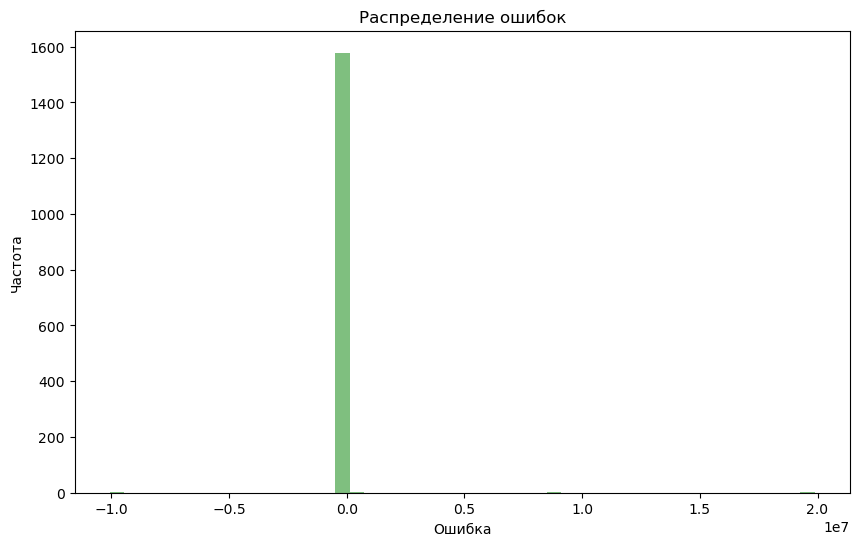

In [43]:
import matplotlib.pyplot as plt

# Вычисление ошибок
errors = y_test - y_pred

# Создание графика
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=50, alpha=0.5, color='g')
plt.xlabel("Ошибка")
plt.ylabel("Частота")
plt.title("Распределение ошибок")

plt.show()


# Poly regression

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.impute import SimpleImputer

# Предполагая, что целевая переменная - это 'price_in_dollars', а остальные колонки - это признаки
X = df.drop('price_in_dollars', axis=1)
y = df['price_in_dollars']

# Создание экземпляра SimpleImputer для замены пропущенных значений на нули
imputer = SimpleImputer(strategy='constant', fill_value=0)

# Применение SimpleImputer к признакам
X = imputer.fit_transform(X)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание экземпляра PolynomialFeatures
poly = PolynomialFeatures(degree=2)

# Преобразование признаков в полиномиальные признаки
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Создание модели линейной регрессии
# model = PoRegression()

# Обучение модели
model.fit(X_train_poly, y_train)

# Прогнозирование
y_pred = model.predict(X_test_poly)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Среднеквадратичная ошибка модели: {mse}")
print(f"Средняя абсолютная ошибка модели: {mae}")


Среднеквадратичная ошибка модели: 359717637977.1182
Средняя абсолютная ошибка модели: 30706.728700459134


# Gradient boosting

In [36]:
import lightgbm as lgbm
import matplotlib.pyplot as plt
import numpy as np
import optuna
import pandas as pd
from lightgbm import log_evaluation, record_evaluation, early_stopping
from optuna.study import StudyDirection
from sklearn.datasets import make_circles
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
# Assuming that the target variable is 'price_in_dollars' and other columns are features
X = df.drop('price_in_dollars', axis=1)
y = df['price_in_dollars']

# Create an instance of SimpleImputer to replace missing values with zeros
imputer = SimpleImputer(strategy='constant', fill_value=0)

# Apply SimpleImputer to features
X = imputer.fit_transform(X)

# Split data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the objective function for optimization
def objective(trial):
    params = {
        'objective': 'regression',
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'num_leaves': trial.suggest_int('num_leaves', 20, 300),
        'max_depth': trial.suggest_int('max_depth', -1, 20),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1),
        'n_estimators': trial.suggest_int('n_estimators', 50, 3000),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 100),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.1, 1.0),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.1, 1.0),
    }
    
    model = lgbm.LGBMRegressor(**params)
    model.fit(X_train, y_train)
    
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    mae = mean_absolute_error(y_test, preds)
    
    return mae

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=1000)

# Best parameters and score
best_params = study.best_params
best_value = study.best_value

print("Best parameters:", best_params)
print("Best value (MAE):", best_value)


[I 2024-03-05 14:23:07,519] A new study created in memory with name: no-name-54f7a8c9-a039-46da-a4e9-5fcb4277086d
[I 2024-03-05 14:23:08,363] Trial 0 finished with value: 3266.441737452032 and parameters: {'num_leaves': 132, 'max_depth': 5, 'learning_rate': 0.04329958499598777, 'n_estimators': 1200, 'min_data_in_leaf': 42, 'bagging_fraction': 0.9593881115954122, 'feature_fraction': 0.5756921749903254}. Best is trial 0 with value: 3266.441737452032.
[I 2024-03-05 14:23:08,881] Trial 1 finished with value: 3466.854692188783 and parameters: {'num_leaves': 155, 'max_depth': 8, 'learning_rate': 0.01850335335671408, 'n_estimators': 508, 'min_data_in_leaf': 96, 'bagging_fraction': 0.8088182257312514, 'feature_fraction': 0.670415756059186}. Best is trial 0 with value: 3266.441737452032.
[I 2024-03-05 14:23:09,838] Trial 2 finished with value: 3273.6325648797792 and parameters: {'num_leaves': 75, 'max_depth': 13, 'learning_rate': 0.08543052602389826, 'n_estimators': 713, 'min_data_in_leaf': 80,

Best parameters: {'num_leaves': 86, 'max_depth': 12, 'learning_rate': 0.01952177773108371, 'n_estimators': 2450, 'min_data_in_leaf': 3, 'bagging_fraction': 0.9755596690762809, 'feature_fraction': 0.5074156701859468}
Best value (MAE): 2693.7148774736443


In [41]:
import lightgbm as lgb
import matplotlib.pyplot as plt

best_params = {
    'num_leaves': 86,
    'max_depth': 12,
    'learning_rate': 0.01952177773108371,
    'n_estimators': 2450,
    'min_data_in_leaf': 3,
    'bagging_fraction': 0.9755596690762809,
    'feature_fraction': 0.5074156701859468,
    'objective': 'regression',
    'metric': 'l1'
}

train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

model = lgb.train(best_params, train_data, valid_sets=[valid_data])

preds = model.predict(X_test)
mse = mean_squared_error(y_test, preds)
mae = mean_absolute_error(y_test, preds)

print("MSE:", mse)
print("MAE:", mae)


c:\Users\Lenovo\anaconda3\envs\dtr\Lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002743 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1141
[LightGBM] [Info] Number of data points in the train set: 6336, number of used features: 73
[LightGBM] [Info] Start training from score 18536.505997
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
MSE: 33323761.16491259
MAE: 2693.7148774736443


# Neural nets


In [62]:
import torch
import torch.nn as nn
import torch.optim as optim

if torch.cuda.is_available():
    device = torch.device("cuda")          # Выбираем GPU
    print("GPU доступен для использования")
else:
    device = torch.device("cpu")           # Если GPU недоступен, используем CPU
    print("GPU недоступен, используем CPU")

GPU недоступен, используем CPU


In [103]:
# Convert boolean columns to numeric
df['is_hybrid'] = df['is_hybrid'].astype(int)
df['gas_equipment'] = df['gas_equipment'].astype(int)

W = df.drop('price_in_dollars', axis=1)
Z = df['price_in_dollars']

# Now we can convert to tensors
# We don't need to reshape the tensor here as X has more than one feature
X = torch.tensor(W.values, dtype=torch.float64)
y = torch.tensor(Z.values, dtype=torch.float64).view(-1, 1)

device = 'cpu'
print(f"Using device: {device}")

X, y = X.to(device), y.to(device)



Using device: cpu


Using device: cpu


Epoch 14990/15000 | Loss: 113332264.0000: 100%|██████████| 15000/15000 [10:59<00:00, 22.75it/s] 


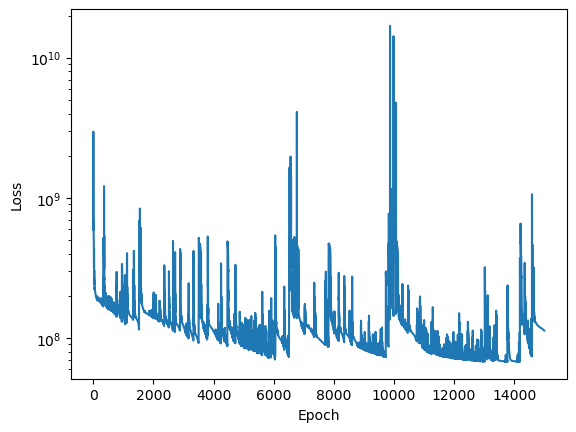

In [109]:
# Convert boolean columns to numeric
df['is_hybrid'] = df['is_hybrid'].astype(int)
df['gas_equipment'] = df['gas_equipment'].astype(int)

# Replace NaN values with 0 in each column
df.fillna(0, inplace=True)

W = df.drop('price_in_dollars', axis=1)
Z = df['price_in_dollars']

# Now we can convert to tensors
# We don't need to reshape the tensor here as X has more than one feature
X = torch.tensor(W.values, dtype=torch.float32)  # Changed dtype to float32
y = torch.tensor(Z.values, dtype=torch.float32).view(-1, 1)  # Changed dtype to float32

device = 'cpu'
print(f"Using device: {device}")

X, y = X.to(device), y.to(device)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.fc1 = nn.Linear(74, 100)  # Adjusted to 74 features
        self.fc2 = nn.Linear(100, 500)
        self.fc3 = nn.Linear(500, 1)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x

net = Net().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.01, weight_decay=0.01)  # Added weight decay for L2 regularization

n_epoch = 10_000
loss_values = []

pbar = tqdm(range(n_epoch))

for epoch in pbar:
    optimizer.zero_grad()
    outputs = net(X)  # Changed from W to X
    loss = criterion(outputs, y)  # Changed from Z to y
    loss.backward()
    optimizer.step()
    
    loss_values.append(loss.item())
    
    if epoch %10 == 0:
        pbar.set_description(f"Epoch {epoch}/{n_epoch} | Loss: {loss_values[-1]:.4f}")

plt.plot(loss_values)
plt.yscale('log')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()
